In [3]:
import requests
import time
import pandas as pd
import json
import matplotlib.pyplot as plt

# URL of the ISS API
url = "https://api.wheretheiss.at/v1/satellites/25544"

# List to store ISS data points
data = []


In [4]:
i = 0  # Counter for points collected
while i < 100:
    attempts = 0
    success = False
    
    while not success and attempts < 5:  
        try:
            response = requests.get(url, timeout=10)  
            response.raise_for_status()
            result = response.json()
            
            timestamp = result['timestamp']
            latitude = float(result['latitude'])
            longitude = float(result['longitude'])
            
            data.append({"timestamp": timestamp, "latitude": latitude, "longitude": longitude})
            
            # Save
            with open("iss_data.json", "w") as f:
                json.dump(data, f)
            
            print(f"Collected point {i+1}")
            
            success = True
            i += 1  # increase counter if successful
            
        except requests.exceptions.RequestException:
            attempts += 1
            print(f"Attempt {attempts} failed. Retrying in 5 seconds...")
            time.sleep(5)
    
    if not success:
        print(f"Skipping point {i+1} after 5 failed attempts.")
        i += 1  

    time.sleep(10)  


Collected point 1
Collected point 2
Collected point 3
Collected point 4
Collected point 5
Collected point 6
Collected point 7
Collected point 8
Collected point 9
Collected point 10
Collected point 11
Collected point 12
Collected point 13
Collected point 14
Collected point 15
Collected point 16
Collected point 17
Collected point 18
Collected point 19
Collected point 20
Collected point 21
Collected point 22
Collected point 23
Collected point 24
Collected point 25
Collected point 26
Collected point 27
Collected point 28
Collected point 29
Collected point 30
Collected point 31
Collected point 32
Collected point 33
Collected point 34
Collected point 35
Collected point 36
Collected point 37
Collected point 38
Collected point 39
Collected point 40
Collected point 41
Collected point 42
Collected point 43
Collected point 44
Collected point 45
Collected point 46
Collected point 47
Collected point 48
Collected point 49
Collected point 50
Collected point 51
Collected point 52
Collected point 53
Co

In [5]:
# Turn list into a table
df = pd.DataFrame(data)
df.head()

,timestamp,latitude,longitude
0,1758203091,4.772525,176.491026
1,1758203102,4.213080,176.888431
2,1758203114,3.602494,177.321235
3,1758203126,2.991654,177.753389
4,1758203138,2.380610,178.185000


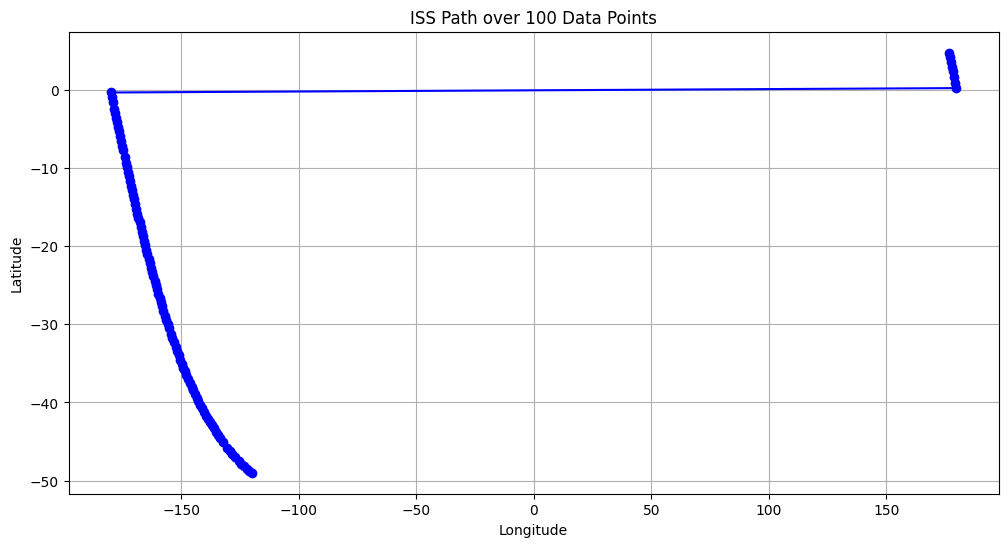

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df['longitude'], df['latitude'], marker='o', linestyle='-', color='blue')
plt.title("ISS Path over 100 Data Points")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()